# 加载包

In [ ]:
import pandas as pd
import numpy as np

# https://seaborn.pydata.org/
import seaborn as sns

# https://matplotlib.org/
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# step 0: 读取数据

In [ ]:
train_dataset = pd.read_csv('/content/sample_data/train.csv')
test_dataset = pd.read_csv('/content/sample_data/test.csv')

print('train dataset: %s, test dataset %s' %(str(train_dataset.shape), str(test_dataset.shape)) )
train_dataset.head(7)

train dataset: (891, 12), test dataset (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S



### Survived
生存与否, 0 = No, 1 = Yes

### Pclass (Ticket class)
票类别, 1 = 1st, 2 = 2nd, 3 = 3rd

### Name
姓名

### Sex
性别

### Age
年龄

### Sibsp
siblings / spouses 在船上的数量。
Sibling = brother, sister, stepbrother, stepsister.
Spouse = husband, wife.

### Parch
parents / children 在船上的数量。
Parent = mother, father.
Child = daughter, son, stepdaughter, stepson

### Ticket (Ticket number)
票号

### Fare (Passenger fare)
旅客票价

### Cabin (Cabin number)
客舱号
	
### Embarked (Port of Embarkation)
上船港口
C = Cherbourg 瑟堡, Q = Queenstown 昆斯敦, S = Southampton 南安普敦

# step 1: 数据观察 (EDA)
## 1.1 整体情况

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 数值型特征基本统计量

In [ ]:
train_dataset.select_dtypes(exclude=['object']).describe().round(decimals=2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


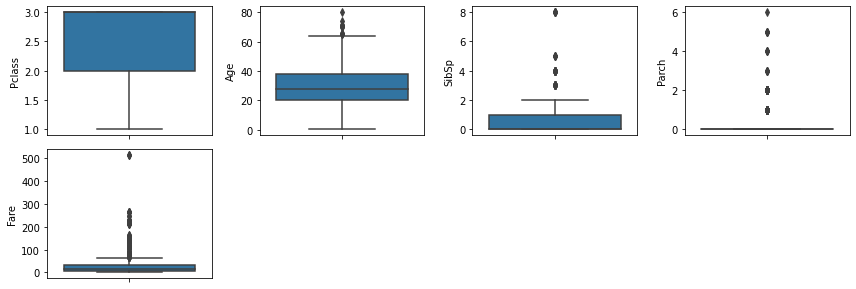

In [ ]:
num_attributes = train_dataset.select_dtypes(exclude='object').drop('PassengerId', axis=1).drop('Survived', axis=1).copy()

fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
print(list(train_dataset['Age']))

[22.0, 38.0, 26.0, 35.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, nan, 31.0, nan, 35.0, 34.0, 15.0, 28.0, 8.0, 38.0, nan, 19.0, nan, nan, 40.0, nan, nan, 66.0, 28.0, 42.0, nan, 21.0, 18.0, 14.0, 40.0, 27.0, nan, 3.0, 19.0, nan, nan, nan, nan, 18.0, 7.0, 21.0, 49.0, 29.0, 65.0, nan, 21.0, 28.5, 5.0, 11.0, 22.0, 38.0, 45.0, 4.0, nan, nan, 29.0, 19.0, 17.0, 26.0, 32.0, 16.0, 21.0, 26.0, 32.0, 25.0, nan, nan, 0.83, 30.0, 22.0, 29.0, nan, 28.0, 17.0, 33.0, 16.0, nan, 23.0, 24.0, 29.0, 20.0, 46.0, 26.0, 59.0, nan, 71.0, 23.0, 34.0, 34.0, 28.0, nan, 21.0, 33.0, 37.0, 28.0, 21.0, nan, 38.0, nan, 47.0, 14.5, 22.0, 20.0, 17.0, 21.0, 70.5, 29.0, 24.0, 2.0, 21.0, nan, 32.5, 32.5, 54.0, 12.0, nan, 24.0, nan, 45.0, 33.0, 20.0, 47.0, 29.0, 25.0, 23.0, 19.0, 37.0, 16.0, 24.0, nan, 22.0, 24.0, 19.0, 18.0, 19.0, 27.0, 9.0, 36.5, 42.0, 51.0, 22.0, 55.5, 40.5, nan, 51.0, 16.0, 30.0, nan, nan, 44.0, 40.0, 26.0, 17.0, 1.0, 9.0, nan, 45.0, nan, 28.0, 61.0, 4.0, 1.0, 21.0, 56.

### 非数值型特征基本统计量

In [ ]:
train_dataset.select_dtypes(include=['object']).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## 1.2 生存率 Y 的信息

In [ ]:
is_survive = train_dataset[train_dataset["Survived"] == 1].shape[0]
print(f'Survived is 1 cnt: {is_survive}, ratio: {is_survive / train_dataset.shape[0]}')

not_survive = train_dataset[train_dataset["Survived"] == 0].shape[0]
print(f'Survived is 0 cnt: {not_survive}, ratio: {not_survive / train_dataset.shape[0]}')

Survived is 1 cnt: 342, ratio: 0.3838383838383838
Survived is 0 cnt: 549, ratio: 0.6161616161616161


### 生存率与特征关系

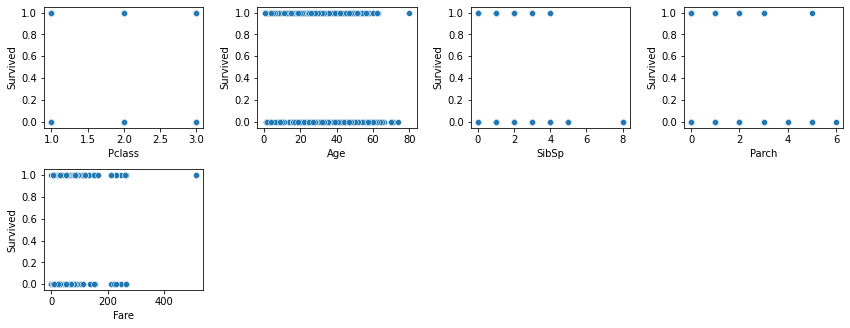

In [ ]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_attributes.columns)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:,i], train_dataset["Survived"])
    
plt.tight_layout()
plt.show()

### Pclass 与生存率的关系

In [ ]:
train_dataset.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [ ]:
train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Sex 与生存率的关系

In [ ]:
train_dataset.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
train_dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### 数值型两两线性相关性

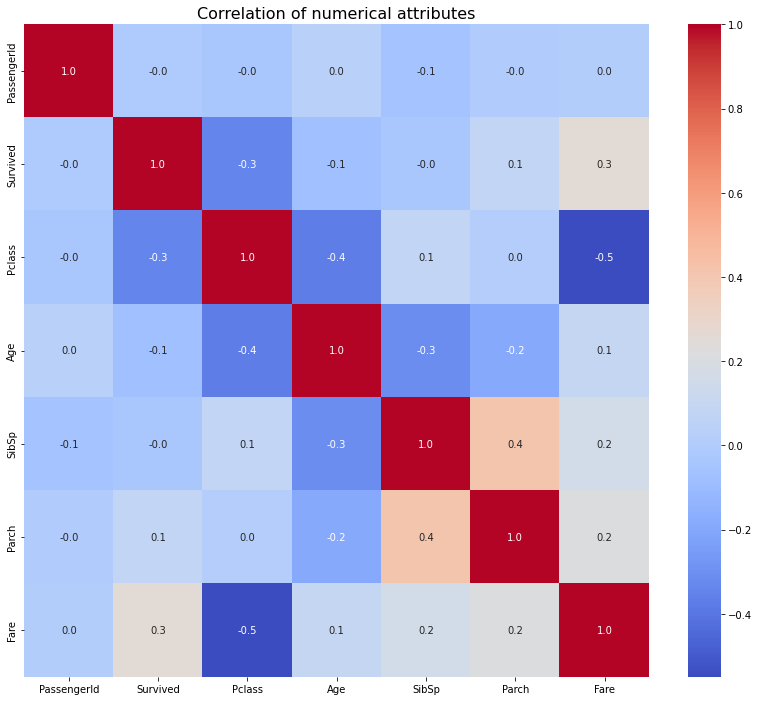

In [ ]:
correlation = train_dataset.corr()

f, ax = plt.subplots(figsize=(14,12))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation, cmap = "coolwarm", annot=True, fmt='.1f')
plt.show()

In [ ]:
correlation['Survived'].sort_values(ascending=False).head(15)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# step 2: 特征工程

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 将训练集和测试集简单合并方便处理
train_test_data = [train_dataset, test_dataset]

## 2.1 Pclass 特征
- 保持原状
- 也可以 one-hot 处理

## 2.2 Name 特征

In [ ]:
train_dataset['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [ ]:
test_dataset.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr


In [ ]:
train_dataset['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

### 将类别少的称谓替换成 other
see https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [ ]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
                                                'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_dataset['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [ ]:
test_dataset['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

### 转换成 one-hot 特征

In [ ]:
# DO NOT MAKE SENSE !
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
# train_dataset['Title'] = train_dataset['Title'].map(title_mapping)

In [ ]:
dummies_Title = pd.get_dummies(train_dataset['Title'], prefix='Title')
train_dataset = pd.concat([train_dataset, dummies_Title], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,0,0,0


In [ ]:
dummies_Title = pd.get_dummies(test_dataset['Title'], prefix='Title')
test_dataset = pd.concat([test_dataset, dummies_Title], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,0,1,0,0


In [ ]:
# 删除特征
features_drop = ['Name', 'Title']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0


## 2.3 Sex 特征

In [ ]:
train_dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
dummies_Sex = pd.get_dummies(train_dataset['Sex'], prefix='Sex')
train_dataset = pd.concat([train_dataset, dummies_Sex], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0


In [ ]:
dummies_Sex = pd.get_dummies(test_dataset['Sex'], prefix='Sex')
test_dataset = pd.concat([test_dataset, dummies_Sex], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,0,0,1
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,1,0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,0,1


In [ ]:
# 删除特征
features_drop = ['Sex']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0


## 2.4 Age 特征

### 缺失值处理
- 缺值样本占比高，直接舍弃/转换
- 缺值样本适中，非连续特征属性，把 NaN 作为一个新类别
- 缺失样本不多，拟合填充，众数/均值/中值填充等
- see https://www.kaggle.com/alexisbcook/missing-values

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Age           714 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Cabin         204 non-null    object 
 9   Embarked      889 non-null    object 
 10  Title_Master  891 non-null    uint8  
 11  Title_Miss    891 non-null    uint8  
 12  Title_Mr      891 non-null    uint8  
 13  Title_Mrs     891 non-null    uint8  
 14  Title_Other   891 non-null    uint8  
 15  Sex_female    891 non-null    uint8  
 16  Sex_male      891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(7)
memory usage: 75.8+ KB


In [ ]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges 
    return df, rfr

train_dataset, rfr = set_missing_ages(train_dataset)

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    int64  
 5   Parch         891 non-null    int64  
 6   Ticket        891 non-null    object 
 7   Fare          891 non-null    float64
 8   Cabin         204 non-null    object 
 9   Embarked      889 non-null    object 
 10  Title_Master  891 non-null    uint8  
 11  Title_Miss    891 non-null    uint8  
 12  Title_Mr      891 non-null    uint8  
 13  Title_Mrs     891 non-null    uint8  
 14  Title_Other   891 non-null    uint8  
 15  Sex_female    891 non-null    uint8  
 16  Sex_male      891 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(7)
memory usage: 75.8+ KB


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Age           332 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Ticket        418 non-null    object 
 6   Fare          417 non-null    float64
 7   Cabin         91 non-null     object 
 8   Embarked      418 non-null    object 
 9   Title_Master  418 non-null    uint8  
 10  Title_Miss    418 non-null    uint8  
 11  Title_Mr      418 non-null    uint8  
 12  Title_Mrs     418 non-null    uint8  
 13  Title_Other   418 non-null    uint8  
 14  Sex_female    418 non-null    uint8  
 15  Sex_male      418 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(7)
memory usage: 32.4+ KB


In [ ]:
tmp_df = test_dataset[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test_dataset.Age.isnull()].values
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
test_dataset.loc[(test_dataset.Age.isnull()), 'Age' ] = predictedAges
test_dataset.head(7)

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,892,3,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,0,0,1
1,893,3,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,1,0
2,894,2,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,0,1
3,895,3,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,0,1
4,896,3,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1,0,1,0
5,897,3,14.0,0,0,7538,9.2250,NaN,S,0,0,1,0,0,0,1
6,898,3,30.0,0,0,330972,7.6292,NaN,Q,0,1,0,0,0,1,0


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Age           418 non-null    float64
 3   SibSp         418 non-null    int64  
 4   Parch         418 non-null    int64  
 5   Ticket        418 non-null    object 
 6   Fare          417 non-null    float64
 7   Cabin         91 non-null     object 
 8   Embarked      418 non-null    object 
 9   Title_Master  418 non-null    uint8  
 10  Title_Miss    418 non-null    uint8  
 11  Title_Mr      418 non-null    uint8  
 12  Title_Mrs     418 non-null    uint8  
 13  Title_Other   418 non-null    uint8  
 14  Sex_female    418 non-null    uint8  
 15  Sex_male      418 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(7)
memory usage: 32.4+ KB


### 分段
- 儿童，少年，青年，中年，老年

In [ ]:
train_dataset['AgeBand'] = pd.qcut(train_dataset['Age'], 5)
train_dataset[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(0.419, 19.0]",0.453039
1,"(19.0, 26.0]",0.335079
2,"(26.0, 31.0]",0.321212
3,"(31.0, 40.0]",0.430851
4,"(40.0, 80.0]",0.373494


In [ ]:
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,AgeBand
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1,"(19.0, 26.0]"
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0,"(31.0, 40.0]"
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0,"(19.0, 26.0]"


In [ ]:
train_dataset.loc[train_dataset['Age'] <= 19, 'Age'] = 0
train_dataset.loc[(train_dataset['Age'] > 19) & (train_dataset['Age'] <= 26), 'Age'] = 1
train_dataset.loc[(train_dataset['Age'] > 26) & (train_dataset['Age'] <= 31), 'Age'] = 2
train_dataset.loc[(train_dataset['Age'] > 31) & (train_dataset['Age'] <= 40), 'Age'] = 3
train_dataset.loc[train_dataset['Age'] > 40, 'Age'] = 4
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,AgeBand
0,1,0,3,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1,"(19.0, 26.0]"
1,2,1,1,3.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0,"(31.0, 40.0]"
2,3,1,3,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0,"(19.0, 26.0]"


In [ ]:
test_dataset.loc[test_dataset['Age'] <= 19, 'Age'] = 0
test_dataset.loc[(test_dataset['Age'] > 19) & (test_dataset['Age'] <= 26), 'Age'] = 1
test_dataset.loc[(test_dataset['Age'] > 26) & (test_dataset['Age'] <= 31), 'Age'] = 2
test_dataset.loc[(test_dataset['Age'] > 31) & (test_dataset['Age'] <= 40), 'Age'] = 3
test_dataset.loc[test_dataset['Age'] > 40, 'Age'] = 4
test_dataset.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,892,3,3.0,0,0,330911,7.8292,NaN,Q,0,0,1,0,0,0,1
1,893,3,4.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,1,0
2,894,2,4.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,0,1


In [ ]:
# 删除特征
features_drop = ['AgeBand']
train_dataset = train_dataset.drop(features_drop, axis=1)
# test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male
0,1,0,3,1.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1
1,2,1,1,3.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0
2,3,1,3,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0


## 2.5 SibSp 和 Parch 特征
- 组合 SibSp 和 Parch 作为 FamilySize 特征
- see https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [ ]:
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch']
test_dataset['FamilySize'] = test_dataset['SibSp'] + test_dataset['Parch']
train_dataset[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [ ]:
# 删除特征
features_drop = ['SibSp', 'Parch']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize
0,1,0,3,1.0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0,1,1
1,2,1,1,3.0,PC 17599,71.2833,C85,C,0,0,0,1,0,1,0,1
2,3,1,3,1.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,1,0,0


## 2.6 Ticket 特征
- 删除

In [ ]:
# 删除特征
features_drop = ['Ticket']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize
0,1,0,3,1.0,7.2500,NaN,S,0,0,1,0,0,0,1,1
1,2,1,1,3.0,71.2833,C85,C,0,0,0,1,0,1,0,1
2,3,1,3,1.0,7.9250,NaN,S,0,1,0,0,0,1,0,0


## 2.7 Fare 特征

In [ ]:
# 具有一等票，二等票等属性

# 中值填充：大部分人买的票
# test_dataset['Fare'] = test_dataset['Fare'].fillna(train_dataset['Fare'].median())

# 按照票价分为四份
# train_dataset['FareBand'] = pd.qcut(train_dataset['Fare'], 4)
# train_dataset[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

# train_dataset.loc[train_dataset['Fare'] <= 7.91, 'Fare'] = 0
# train_dataset.loc[(train_dataset['Fare'] > 7.91) & (train_dataset['Fare'] <= 14.454), 'Fare'] = 1
# train_dataset.loc[(train_dataset['Fare'] > 14.454) & (train_dataset['Fare'] <= 31), 'Fare']   = 2
# train_dataset.loc[train_dataset['Fare'] > 31, 'Fare'] = 3
# train_dataset['Fare'] = train_dataset['Fare'].astype(int)


# test_dataset.loc[test_dataset['Fare'] <= 7.91, 'Fare'] = 0
# test_dataset.loc[(test_dataset['Fare'] > 7.91) & (test_dataset['Fare'] <= 14.454), 'Fare'] = 1
# test_dataset.loc[(test_dataset['Fare'] > 14.454) & (test_dataset['Fare'] <= 31), 'Fare']   = 2
# test_dataset.loc[test_dataset['Fare'] > 31, 'Fare'] = 3
# test_dataset['Fare'] = test_dataset['Fare'].astype(int)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_dataset[['Fare']])

MinMaxScaler()

In [ ]:
train_dataset['Fare_scaled'] = scaler.transform(train_dataset[['Fare']])
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled
0,1,0,3,1.0,7.2500,NaN,S,0,0,1,0,0,0,1,1,0.014151
1,2,1,1,3.0,71.2833,C85,C,0,0,0,1,0,1,0,1,0.139136
2,3,1,3,1.0,7.9250,NaN,S,0,1,0,0,0,1,0,0,0.015469


In [ ]:
test_dataset['Fare_scaled'] = scaler.transform(test_dataset[['Fare']])
test_dataset.head(3)

,PassengerId,Pclass,Age,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled
0,892,3,3.0,7.8292,NaN,Q,0,0,1,0,0,0,1,0,0.015282
1,893,3,4.0,7.0000,NaN,S,0,0,0,1,0,1,0,1,0.013663
2,894,2,4.0,9.6875,NaN,Q,0,0,1,0,0,0,1,0,0.018909


In [ ]:
# 删除特征
features_drop = ['Fare']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled
0,1,0,3,1.0,NaN,S,0,0,1,0,0,0,1,1,0.014151
1,2,1,1,3.0,C85,C,0,0,0,1,0,1,0,1,0.139136
2,3,1,3,1.0,NaN,S,0,1,0,0,0,1,0,0,0.015469


## 2.8 Cabin 特征
- 直接删除
- 转换特征

In [ ]:
# 直接删除
# del train_dataset['Cabin']
# del test_dataset['Cabin']

In [ ]:
# 转换特征
train_dataset['Has_Cabin'] = train_dataset["Cabin"].apply(lambda x: 'yes' if pd.isna(x) else 'no')

dummies_Cabin = pd.get_dummies(train_dataset['Has_Cabin'], prefix='Has_Cabin')
train_dataset = pd.concat([train_dataset, dummies_Cabin], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin,Has_Cabin_no,Has_Cabin_yes
0,1,0,3,1.0,NaN,S,0,0,1,0,0,0,1,1,0.014151,yes,0,1
1,2,1,1,3.0,C85,C,0,0,0,1,0,1,0,1,0.139136,no,1,0
2,3,1,3,1.0,NaN,S,0,1,0,0,0,1,0,0,0.015469,yes,0,1


In [ ]:
test_dataset['Has_Cabin'] = test_dataset["Cabin"].apply(lambda x: 'yes' if pd.isna(x) else 'no')

dummies_Cabin = pd.get_dummies(test_dataset['Has_Cabin'], prefix='Has_Cabin')
test_dataset = pd.concat([test_dataset, dummies_Cabin], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Age,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin,Has_Cabin_no,Has_Cabin_yes
0,892,3,3.0,NaN,Q,0,0,1,0,0,0,1,0,0.015282,yes,0,1
1,893,3,4.0,NaN,S,0,0,0,1,0,1,0,1,0.013663,yes,0,1
2,894,2,4.0,NaN,Q,0,0,1,0,0,0,1,0,0.018909,yes,0,1


In [ ]:
# 删除特征
features_drop = ['Cabin', 'Has_Cabin']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes
0,1,0,3,1.0,S,0,0,1,0,0,0,1,1,0.014151,0,1
1,2,1,1,3.0,C,0,0,0,1,0,1,0,1,0.139136,1,0
2,3,1,3,1.0,S,0,1,0,0,0,1,0,0,0.015469,0,1


## 2.9 Embarked
- 众数填充

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Age            891 non-null    float64
 4   Embarked       889 non-null    object 
 5   Title_Master   891 non-null    uint8  
 6   Title_Miss     891 non-null    uint8  
 7   Title_Mr       891 non-null    uint8  
 8   Title_Mrs      891 non-null    uint8  
 9   Title_Other    891 non-null    uint8  
 10  Sex_female     891 non-null    uint8  
 11  Sex_male       891 non-null    uint8  
 12  FamilySize     891 non-null    int64  
 13  Fare_scaled    891 non-null    float64
 14  Has_Cabin_no   891 non-null    uint8  
 15  Has_Cabin_yes  891 non-null    uint8  
dtypes: float64(2), int64(4), object(1), uint8(9)
memory usage: 56.7+ KB


In [ ]:
train_dataset.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# 众数填充
train_dataset['Embarked'] = train_dataset['Embarked'].fillna('S')
test_dataset['Embarked'] = test_dataset['Embarked'].fillna('S')

In [ ]:
dummies_Embarked = pd.get_dummies(train_dataset['Embarked'], prefix='Embarked')
train_dataset = pd.concat([train_dataset, dummies_Embarked], axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1.0,S,0,0,1,0,0,0,1,1,0.014151,0,1,0,0,1
1,2,1,1,3.0,C,0,0,0,1,0,1,0,1,0.139136,1,0,1,0,0
2,3,1,3,1.0,S,0,1,0,0,0,1,0,0,0.015469,0,1,0,0,1


In [ ]:
dummies_Embarked = pd.get_dummies(test_dataset['Embarked'], prefix='Embarked')
test_dataset = pd.concat([test_dataset, dummies_Embarked], axis=1)
test_dataset.head(3)

,PassengerId,Pclass,Age,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,892,3,3.0,Q,0,0,1,0,0,0,1,0,0.015282,0,1,0,1,0
1,893,3,4.0,S,0,0,0,1,0,1,0,1,0.013663,0,1,0,0,1
2,894,2,4.0,Q,0,0,1,0,0,0,1,0,0.018909,0,1,0,1,0


In [ ]:
# 删除特征
features_drop = ['Embarked']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,PassengerId,Survived,Pclass,Age,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1.0,0,0,1,0,0,0,1,1,0.014151,0,1,0,0,1
1,2,1,1,3.0,0,0,0,1,0,1,0,1,0.139136,1,0,1,0,0
2,3,1,3,1.0,0,1,0,0,0,1,0,0,0.015469,0,1,0,0,1


In [ ]:
test_dataset.head(3)

,PassengerId,Pclass,Age,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,892,3,3.0,0,0,1,0,0,0,1,0,0.015282,0,1,0,1,0
1,893,3,4.0,0,0,0,1,0,1,0,1,0.013663,0,1,0,0,1
2,894,2,4.0,0,0,1,0,0,0,1,0,0.018909,0,1,0,1,0


In [ ]:
train_dataset_with_passengerid = train_dataset.copy(deep=True)
features_drop = ['PassengerId']
train_dataset = train_dataset.drop(features_drop, axis=1)
test_dataset = test_dataset.drop(features_drop, axis=1)
train_dataset.head(3)

,Survived,Pclass,Age,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Sex_female,Sex_male,FamilySize,Fare_scaled,Has_Cabin_no,Has_Cabin_yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1.0,0,0,1,0,0,0,1,1,0.014151,0,1,0,0,1
1,1,1,3.0,0,0,0,1,0,1,0,1,0.139136,1,0,1,0,0
2,1,3,1.0,0,1,0,0,0,1,0,0,0.015469,0,1,0,0,1


# step 3: 模型训练

In [ ]:
X = train_dataset.drop('Survived', axis=1)
y = train_dataset['Survived']
test = test_dataset

X.shape, y.shape, test.shape

((891, 16), (891,), (418, 16))

In [ ]:
X.columns

Index(['Pclass', 'Age', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Sex_female', 'Sex_male', 'FamilySize', 'Fare_scaled',
       'Has_Cabin_no', 'Has_Cabin_yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
test.columns

Index(['Pclass', 'Age', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Sex_female', 'Sex_male', 'FamilySize', 'Fare_scaled',
       'Has_Cabin_no', 'Has_Cabin_yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

## 尝试不同 baseline 模型

In [ ]:
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# 训练集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8212290502793296

In [ ]:
# The cross_val_score returns the accuracy for all the folds
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.82122905, 0.82022472, 0.82022472, 0.80337079, 0.87078652])

In [ ]:
print(scores.mean())

# extremely low, which means that our model has a very low variance, which is actually very good since that means that the prediction that we obtained on one test set is not by chance
print(scores.std())

0.8271671583704727
0.022806015880129465


### Random Forest

In [ ]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
print(scores.mean())
print(scores.std())

0.7990961019396146
0.028771882158913718


## 超参数搜索
- see https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1.0, 2.0],
    'penalty': ['l1', 'l2']
}

clf = LogisticRegression()

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X, y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 2.0, 'penalty': 'l2'}
0.8282907538760906


## 特征重要性

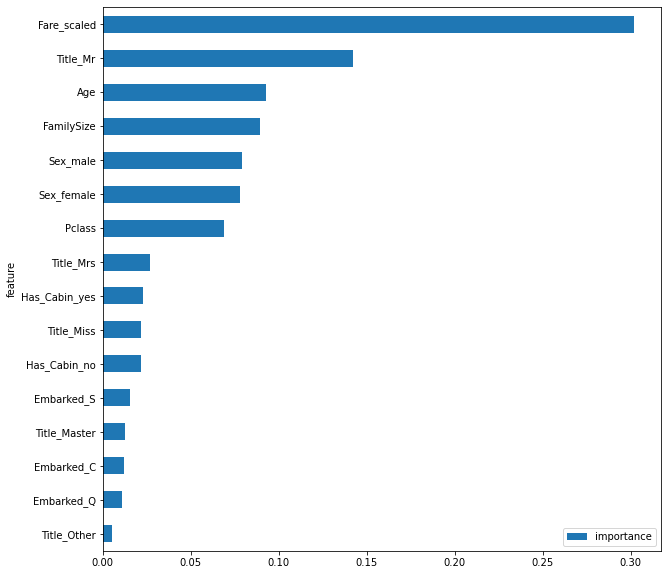

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(10, 10))

## 混淆矩阵

Accuracy: 96 % 

Confusion Matrix in Numbers
[[433   6]
 [ 21 252]]

Confusion Matrix in Percentage
[[0.99 0.01]
 [0.08 0.92]]



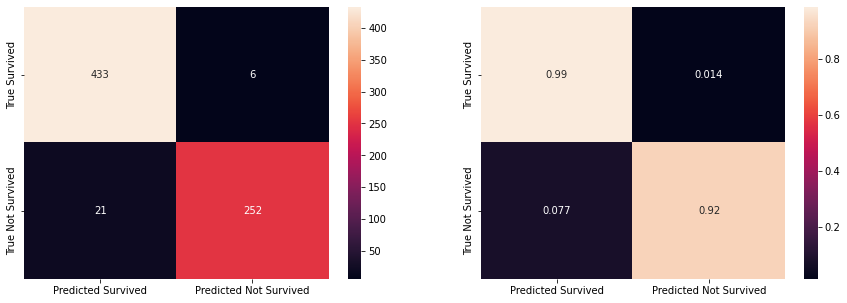

In [78]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred_random_forest_training_set)
np.set_printoptions(precision=2)

print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix, 
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent, 
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)

## 错误分类样本分析

In [80]:
from sklearn.model_selection import train_test_split
split_train, split_cv = train_test_split(train_dataset_with_passengerid, test_size=0.2, random_state=0)
#print(split_cv.shape)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(split_train.values[:,2:], split_train.values[:,1])

predictions = clf.predict(split_cv.values[:,2:])
#print(predictions)

origin_train_dataset = pd.read_csv('/content/sample_data/train.csv')
bad_cases = origin_train_dataset.loc[origin_train_dataset['PassengerId'].isin(split_cv[predictions != split_cv.values[:,1]]['PassengerId'].values)]
#print(bad_cases.shape)
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S


# 学习率曲线
<img src="./learning_curve.png" style="zoom:50%">

In [ ]:
from sklearn.model_selection import learning_curve  
clf = RandomForestClassifier(n_estimators=100)
#clf = LinearSVC()
train_sizes,train_scores,test_scores=learning_curve(estimator=clf,X=X,y=y,
                                                    train_sizes=np.linspace(0.1,1.0,10),cv=5) 
train_mean= np.mean(train_scores,axis=1)
test_mean =np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='test accuracy')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')  
plt.ylim([0.5,1.0])
plt.show()

## 模型融合
- Bagging
- XGBoost

In [ ]:
logreg = LogisticRegression()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, rf, gboost]

trained_models = []
for model in models:
    model.fit(X_train, y_train)
    trained_models.append(model)

predictions = []
for model in trained_models:
    predictions.append(model.predict_proba(X_test)[:, 1])

predictions_df = pd.DataFrame(predictions).T
predictions_df['out'] = predictions_df.mean(axis=1)
predictions_df['out'] = predictions_df['out'].map(lambda s: 1 if s >= 0.5 else 0)